# Customer Segmentation using K means

The goal of this project is to segment mall customers into distinct groups based on Age, Annual Income, and Spending Score. This helps the business understand customer behavior and design targeted marketing strategies.
Dataset is here : [Kaggle Customer Segmentation](https://www.kaggle.com/code/ash316/unsupervised-learning-k-means-clustering)

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [5]:
# Step 2: Load dataset
data=pd.read_csv("/content/Mall_Customers.csv")
print("Dataset shape:", data.shape)
data

Dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
# Step 3: Select features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Scale features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

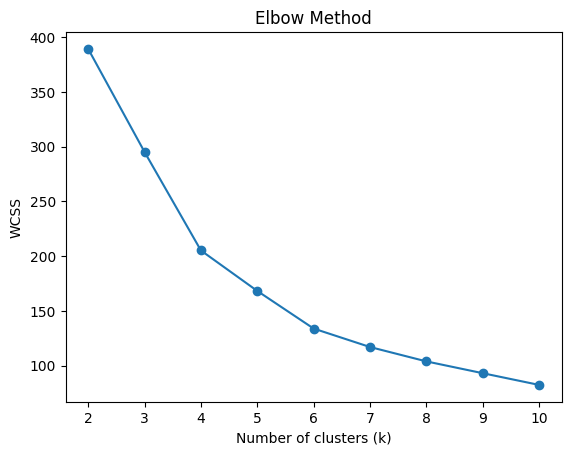

In [9]:
# Step 4: Find optimal number of clusters (Elbow Method)
wcss=[] # within cluster sum of squares
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42, n_init=10)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

as k increases , wcss decreases quickly

In [10]:
# Step 5: Silhouette Score check
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42, n_init=10)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.335
k=3, Silhouette Score=0.358
k=4, Silhouette Score=0.404
k=5, Silhouette Score=0.417
k=6, Silhouette Score=0.428
k=7, Silhouette Score=0.417
k=8, Silhouette Score=0.408
k=9, Silhouette Score=0.418
k=10, Silhouette Score=0.407


In [13]:
# Step 6: Fit final model (choose k=5 for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

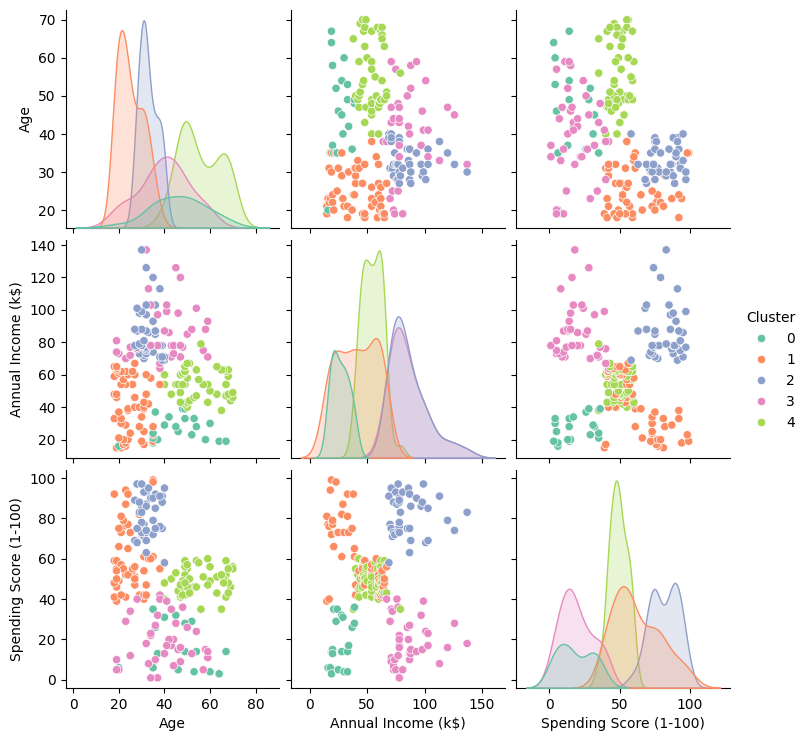

In [15]:
# Step 7: Visualize clusters (pairplot)
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='Set2')
plt.show()

The pairplot shows that customers naturally form distinct clusters based on Age, Annual Income, and Spending Score. High spenders are generally younger or middle-aged with higher income, while low spenders tend to be older or have lower income.

In [19]:
# Step 8: Cluster summary
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)[['Age','Annual Income (k$)','Spending Score (1-100)']]
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


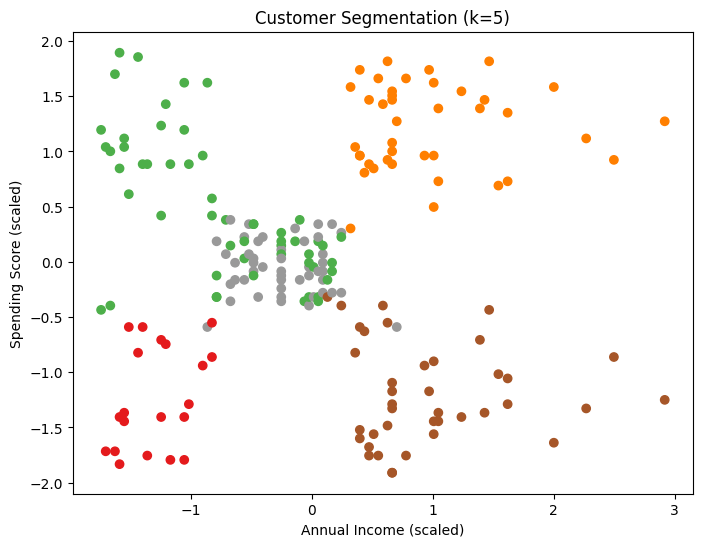

In [21]:
# Optional: Visualize 2D clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,1], X_scaled[:,2], c=data['Cluster'], cmap='Set1')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation (k=5)")
plt.show()

**Conclusion- **

High Income, High Spending – Orange

Low Income, High Spending – Green

Low Income, Low Spending – Red

High Income, Low Spending – Brown

Average Income and Spending – Gray